In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("E:/NTI/auto-mpg_with_nan.csv")
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.drop('car name', axis=1, inplace=True)


In [5]:
df = df.astype({col: float for col in df.select_dtypes(include='int').columns})



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
dtypes: float64(7), object(1)
memory usage: 25.0+ KB


In [7]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


In [8]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
dtypes: float64(8)
memory usage: 25.0 KB


In [10]:
df['cylinders'].unique()


array([8., 4., 6., 3., 5.])

In [11]:
y=df.iloc[:,0:1]
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [12]:
X=df.iloc[:,1:8]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
394,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
395,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
396,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()

In [50]:
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)

In [55]:
from sklearn.metrics import r2_score
test_acc=r2_score(y_test,y_pred)
test_acc

0.8498136267060132

In [54]:
train_acc=regr.score(X_train_scaled,y_train)
train_acc

0.8085098069459155

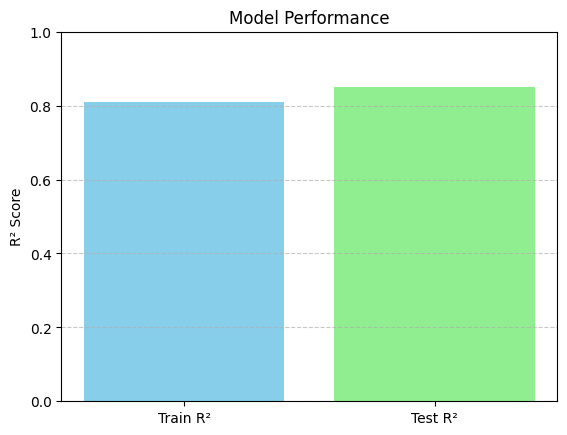

In [57]:
import matplotlib.pyplot as plt

# R² scores
scores = [train_acc, test_acc]
labels = ['Train R²', 'Test R²']

# Plot
plt.bar(labels, scores, color=['skyblue', 'lightgreen'])
plt.ylabel('R² Score')
plt.title('Model Performance')
plt.ylim(0, 1)  # adjust if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [66]:
from sklearn.metrics import mean_squared_error

train_loss = mean_squared_error(y_train, regr.predict(X_train_scaled))
test_loss = mean_squared_error(y_test, y_pred)
print(train_loss)
print(test_loss)

11.167873182374857
10.24652539253157
